# CP7: Hypothesis testing: Type-I and Type-II errors; Likelihood ratios

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem #1 (2 points)

**A company manufacturing computer monitors claims that the faulty rate of the screen population is 5%. We want to test if the claim is true. We have ordered a sample of 100 monitors to test. We choose t_cut = 9 as the maximum number of faulty monitors that we are willing to have and still accept that the manufacturer’s claim is true.**

**(a) What is the significance level (Type-I error), α, of the chosen threshold?**

In [104]:
from scipy.stats import binom
from scipy import integrate


In [105]:
tot_t = 100 # number of samples
t_cut = 9
claimed_hypothesis = 0.05

In [109]:
n, p = tot_t, claimed_hypothesis


In [110]:
prob  = integrate.quad(binom.pmf, -np.inf, t_cut, args = (n, p))

In [112]:
alpha = 1 - prob[0]
print("Alpha = " + str(alpha))


Alpha = 0.04554060520399439


**(b) What is the probability β of a Type-II error if the true faulty rate is 15%?
NB: we can only compute the Type-II error for a concrete H1 scenario (i.e. fixed faulty rate), but not if the faulty rate is unknown!**

**Hint: Use scipy.stats.binom (scipy’s binomial distribution) and its method pmf.**

In [113]:
true_hypothesis = 0.15

In [114]:
n2, p2 = tot_t, 0.15


In [115]:
prob2  = integrate.quad(binom.pmf, t_cut, np.inf,args = (n2, p2))

In [117]:
beta = 1 - prob2[0]
print("Beta = " + str(beta))

Beta = 0.0400644070342111


## Problem #2 (3 points)

**A Time-of-Flight (ToF) system designed to separate kaons (mK = 493.7 MeV/c2) from pions (mπ = 139.6 MeV/c2) consists of two scintillation counters that are a distance L = 20 m apart. For a particle with mass m and momentum p, the time needed to travel between the two scintillators is**

**t = L/c x sqrt( 1 + (mc/p)^2)**

**where c = 3 × 10^8 m/s is the speed of light in vacuum.
The time resolution of the ToF system is σ = 400 ps (i.e. for an average time t, the time reported by the system follows a Gaussian distribution with mean t and width σ)^**

**(a) Write a Gaussian class that calculates the integral between an arbitrary point xval and ±∞. Name these methods integralAbove and integralBelow, to be used for calculating α and β values, as discussed below.
Hint: You should try to recycle some of the code developed for the Week-8, CP #5 in order to save time. Be careful to choose practical values for ±∞!**

In [58]:
sigma = 0.608  # = 400 ps (converted to natural units)

In [60]:
from scipy.stats import norm

In [61]:
# class to model the signal distribution 
class Gaussian:

    def __init__(self, t, sigma = sigma):
        self.mean = t
        self.sigma = sigma
        self.distribution = norm(self.mean, self.sigma).pdf
        
        
    def integralAbove(self, xval):
        #distribution = lambda x: 1/(self.sigma*np.sqrt(2*np.pi)) * np.exp(-(np.array(x)-self.mean)**2 / (2*(self.sigma**2))) 
        return integrate.quad(self.distribution, xval, np.inf)[0]
    
    
    def intergalBelow(self, xval):
        #distribution = lambda x: 1/(self.sigma*np.sqrt(2*np.pi)) * np.exp(-(np.array(x)-self.mean)**2 / (2*(self.sigma**2))) 
        return integrate.quad(self.distribution , -np.inf, xval)[0]
    

**(b) Create another class ROC that calculates (αi, βi) pairs of ToF performance for distinguishing between pions and kaons for a given momentum p and an arbitray threeshold t^i_cut. Use the class to produce 100 performace points evenly spaced between the average travel times for kaons and pions**

In [62]:
class ROC:
    
    def __init__(self, p):

        self.m_kaon = 0.4937 # GeV/c^2 
        self.m_pion = 0.1396 # GeV/c^2
        self.L = 101.5  # = 20m (converted to natural units)

        self.momentum = p
        

    def pair(self):

        # arrays to store alphas and betas
        alphas = np.zeros(100)
        betas = np.zeros(100)

        time_kaon = self.L*np.sqrt(1 + (self.m_kaon/self.momentum)**2)
        time_pion = self.L*np.sqrt(1 + (self.m_pion/self.momentum)**2)

        gauss_kaon = Gaussian(time_kaon)
        gauss_pion = Gaussian(time_pion)

        N = 100
        t_cut = np.linspace(time_pion, time_kaon, N)

        for i in range(N):

            alpha = gauss_kaon.intergalBelow(t_cut[i])
            beta = gauss_pion.integralAbove(t_cut[i])

            alphas[i] = alpha
            betas[i] = beta

        return alphas, betas


  

        
        

**(c) Create a single plot that overlays the ROC kaon-pion separation curves for p = 3 GeV/c, p = 4 GeV/c and p = 6 GeV/c. Which momentum value gives better performance and why?**

**Hint: it is more practical to use natural units than SI in the code implementation.**

In [63]:
roc3 = ROC(3)
alpha3, beta3 = roc3.pair()

roc4 = ROC(4)
alpha4, beta4 = roc4.pair()

roc6 = ROC(6)
alpha6, beta6 = roc6.pair()

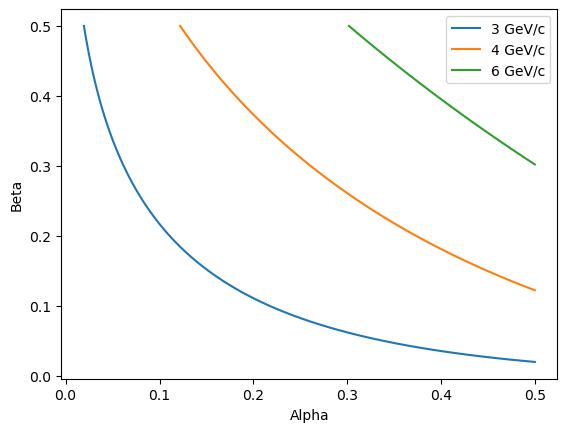

In [65]:
plt.plot(alpha3, beta3, label = "3 GeV/c")
plt.plot(alpha4, beta4, label = "4 GeV/c")
plt.plot(alpha6, beta6, label = "6 GeV/c")
plt.ylabel("Beta")
plt.xlabel("Alpha")
plt.legend()


The best performance is given by the value of momentum of 3 GeV/c as for this one, for a give value of alpha we get the highest power of 1 - beta. And it is the line closer to the origin.

## Problem #3 (2 points for 3.1, and 3 points for 3.2)

**In 1992, the ARGUS e+e− experiment reported the observation of the charmed and doubly strange baryon Ωc through its decay channel Ξ K π π . The obtained mass spectrum is shown in the figure below.**

total # of events = 43.0 # of bins= 50


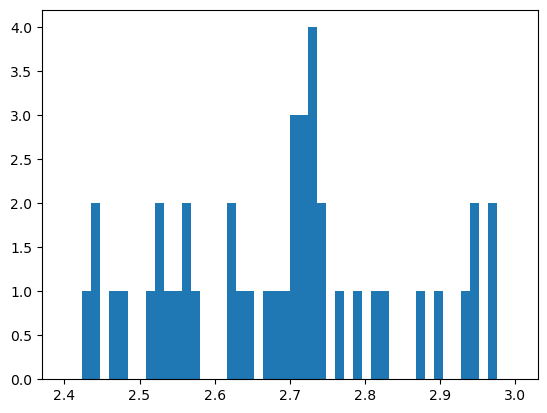

In [118]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
nbins = 50
XMIN = 2.4 # in GeV
XMAX = 3.0 # in GeV
bins = np.linspace(XMIN, XMAX, nbins)
counts = np.array([0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1,
0, 1, 1, 1, 3, 3, 4, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0]).astype(float)
tot = 0
for i in counts:
    tot += i
print("total # of events =",tot, "# of bins=",len(counts))
plt.hist(bins, bins=len(counts),weights=counts, range=(min(bins), max(bins))) 
plt.show()

## 3.1 

**(a) Assuming that all the events are caused by background, calculate the average number of backgrounds events per bin.**

In [119]:
average = tot / len(counts)

print("Average number of backgrounds events per bin = " + str(average))

Average number of backgrounds events per bin = 0.86


**(b) Use method numpy.argmax to find the location of the peak in the mass spectrum (in GeV).**

In [120]:
loc = bins[np.argmax(counts)]
print("Location of the peak = " + str(loc) + " GeV")

Location of the peak = 2.730612244897959 GeV


**(c) Define a ±2.5σ window around the peak (σ = 12 MeV, the width of the histogram bin), and count the total number of events Nobs in this window (use 5 bins in total, with the middle bin containing the peak).**

In [121]:
sigma = 0.012  
window = 2.5*sigma

w_ind = np.where((bins >= peak_mass - window) & (bins <= peak_mass + window))[0]

Nobs = np.sum(counts[w_ind])

print("Number of events in the window = " + str (Nobs))

Number of events in the window = 12.0


**(d) Estimate the number of expected background events within the window Nbgd, and calculate the probability for a Poisson distribution with mean Nbgd to produce Nobs or more events, and the number of standard devia- tions it corresponds to.
Hint #1: Use scipy.stats.poisson (scipy’s Poisson distribution), and its method pmf or sf.
Hint #2: Use scipy.special.erfinv(1 - pvalue) * np.sqrt(2) to convert a p-value into the corresponding number of standard deviations.**

In [123]:
Nbgd = average*2.5*2
print("Number of expected background events within the window = " + str(Nbgd))

Number of expected background events within the window = 4.3


In [127]:
from scipy.special import erfinv
from scipy.stats import poisson
from scipy.integrate import simpson

In [135]:
values = np.arange(Nobs)


distribution =poisson.pmf(values,Nbgd)
pvalue = 1 - simpson(distribution, values)

prob = pvalue *100

print("Probability = " + str(np.round(prob,2)) + "%")

n_sigmas = erfinv(1 - pvalue)* np.sqrt(2)


print("Number of standard deviations = " + str(n_sigmas))

Probability = 0.59%
Number of standard deviations = 2.753938683162209


## 3.2 We will repeat the significance evaluation, this time by doing a signal-plus- background (H1) and a background-only (H0) fits. Most of the code we will need here has been developed in (and can be recycled from) the Week-8, CP#5.

**(a) Write two classes, Flat (to describe the flat background), and Gaussian (to describe the hypothetical signal). Class Flat should be a simplified version of class Linear developed for the Week-8, CP#5.**

In [139]:
class Flat:

    def __init__(self,constant, minval, maxval, mass):
        self.constant = constant 
        self.minval = minval
        self.maxval = maxval    
        self.mass = mass

    def pdf(self):

        pdf = lambda x : constant + 0*x + 0*x**2
        int = integrate.quad(pdf, minval, maxval)[0]

        return pdf/int

In [140]:
class Gaussian:

    def __init__(self,constant, minval, maxval, mass, mean, sigma = sigma):
        self.constant = constant 
        self.minval = minval
        self.maxval = maxval    
        self.mass = mass
        self.mean = mean
        self.sigma = sigma

    def pdf(self):

        pdf = lambda x : constant + 0*x + 0*x**2 + (1/(self.sigma*np.sqrt(2*np.pi))) * np.exp(-(np.array(x)-self.mean)**2 / (2*(self.sigma**2))) 
        int = integrate.quad(pdf, minval, maxval)[0]

        return pdf/int

**(b) We will need a minimiser that returns the χ2 (as minimised by the fit). As discussed in previous weeks, you are welcome to use your favourite minimiser (and you should really have one available by now). Examples: iminuit, your own custom implementation of the log-likelihood, or the (χ2-equivalent of the) log-likelihood for a binned fit, as described in the Week-8 lecture notes (and in Ref. [6]).**

**(c) Unlike what we had done in Week-8, here we will assume that we do not know the location (i.e. Gaussian mean) of the hypothetical signal, but we do know its width (Gaussian sigma, equal to the width of the histogram bin). We will perform 1 + N fits: the first one for the H0 hypothesis, and the remaining N fits will scan the mass spectrum by assuming each time that the location of the signal is fixed at the centre of the i-th bin. For each of the N fits, calculate the χ2(H0) − χ2(H1) difference. Put all these values into a histogram, and plot it.**

In [141]:
# The minimiser I am more used to using in this course is minuit, using the following structure:

In [ ]:
# Define the negative of the log of the joint likelihood for the normalized combined function

def NLL_func(F, M,b,c):

    return -np.sum(np.log(pdf_comb_2(data, F, M,b,c)))

In [ ]:
# Estimate best value of lifetime by minimising NLL using Minuit

m_comb_2 = Minuit(NLL_func_comb_2, F = 0.9, M = 2.5, b = -0.016, c=0.007)

m_comb_2.errordef = Minuit.LIKELIHOOD
m_comb_2.migrad()  # run optimiser
m_comb_2.hesse()   # run covariance estimator

print(m_comb_2.values)  # print estimated values
print(m_comb_2.errors)  # print error of the estimated values

**(d) Find the maximum value of the χ2 (H0 )−χ2 (H1 ) array (using numpy.amax). Use (Wilk’s theorem, and) previously seen scipy methods stats.chi2.cdf and special.erfinv to calculate the significance of the deviation.**

In [ ]:

n_sigmas = erfinv(1 - pvalue)* np.sqrt(2)